In [ ]:
import pandas as pd
import numpy as np

csv = pd.read_csv('large_data.csv')
df = pd.DataFrame(csv)
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [ ]:
# user DF for the 1,2,3,4 values
df['TYPE'] = df['TYPE'].replace(['ALLERGY', 'FLU', 'COVID', 'COLD'], ['1', '2', '3', '4'])
print(df['TYPE'])

0        1
1        1
2        1
3        1
4        1
        ..
44448    2
44449    2
44450    2
44451    2
44452    2
Name: TYPE, Length: 44453, dtype: object


In [ ]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df.TYPE)

# Concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')

# drop the values
merged = merged.drop(['TYPE'], axis='columns')

# print the dataframe
print(merged)

       COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
0          0             0          1            0           1            0   
1          0             0          1            0           0            0   
2          0             1          1            1           0            0   
3          0             0          0            1           1            0   
4          0             0          1            0           1            0   
...      ...           ...        ...          ...         ...          ...   
44448      1             0          0            1           0            0   
44449      1             1          0            1           1            0   
44450      0             0          1            0           1            0   
44451      0             0          0            1           1            1   
44452      1             1          0            0           0            1   

       FEVER  NAUSEA  VOMITING  DIARRHEA  ...  ITCH

In [ ]:
# Split data into train and test, start from COVID, then move oo to the 3 other types
from sklearn.model_selection import train_test_split
X=merged.drop(columns=['COVID','ALLERGY','COLD','FLU'])
y=merged['COVID']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)

KeyError: ignored

In [ ]:
# Split data into train and test, start from COVID, then move oo to the 3 other types
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)

In [ ]:
# try and see if numbers match for types

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# # Instantiate model with 1000 decision trees

# Hyperparameters to Increase the Predictive Power
# n_estimators: Number of trees the algorithm builds before averaging the predictions.

# max_features: Maximum number of features random forest considers splitting a node.

# min_sample_leaf: Determines the minimum number of leaves required to split an internal node.

# criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)

# !Empirical good default values for number of features are max_features=n_features for regression problems,
# and max_features=sqrt(n_features) for classification tasks

# max_leaf_nodes: Maximum leaf nodes in each tree
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=10,n_jobs=-1, max_features=0.2, criterion='entropy',random_state=42)
# Train the model on training data

# from sklearn.model_selection import RandomizedSearchCV as RSCV

# param_grid = {'n_estimators':np.arange(50,200,15),
#               'max_features':np.arange(0.1, 1, 0.1),
#               'max_depth': [3, 5, 7, 9],
#               'max_samples': [0.3, 0.5, 0.8]}

# model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
# model = model.best_estimator_


rf.fit(X_train,y_train);

In [ ]:
# Split data into train and test, start from COVID, then move oo to the 3 other types
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# # Instantiate model with 1000 decision trees

# Hyperparameters to Increase the Predictive Power
# n_estimators: Number of trees the algorithm builds before averaging the predictions.

# max_features: Maximum number of features random forest considers splitting a node.

# min_sample_leaf: Determines the minimum number of leaves required to split an internal node.

# criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)

# !Empirical good default values for number of features are max_features=n_features for regression problems,
# and max_features=sqrt(n_features) for classification tasks

# max_leaf_nodes: Maximum leaf nodes in each tree
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=10,n_jobs=-1, max_features=0.2, criterion='entropy',random_state=42)
Train the model on training data

from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_


rf.fit(X_train,y_train);

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print or evaluation metrics for each combination
print(f"accuracy score: {accuracy}")
print(f"precision score: {precision}")
print(f"recall score: {recall}")
print(f"f1 score: {f1}")
print('\n')

accuracy score: 0.930488902219556
precision score: 0.6713935196537769
recall score: 0.5276782902753248
f1 score: 0.5346547766825469




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98      4916
           2       0.91      0.99      0.95      7530
           3       0.00      0.00      0.00       599
           4       0.81      0.12      0.21       291

    accuracy                           0.93     13336
   macro avg       0.67      0.53      0.53     13336
weighted avg       0.89      0.93      0.90     13336



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


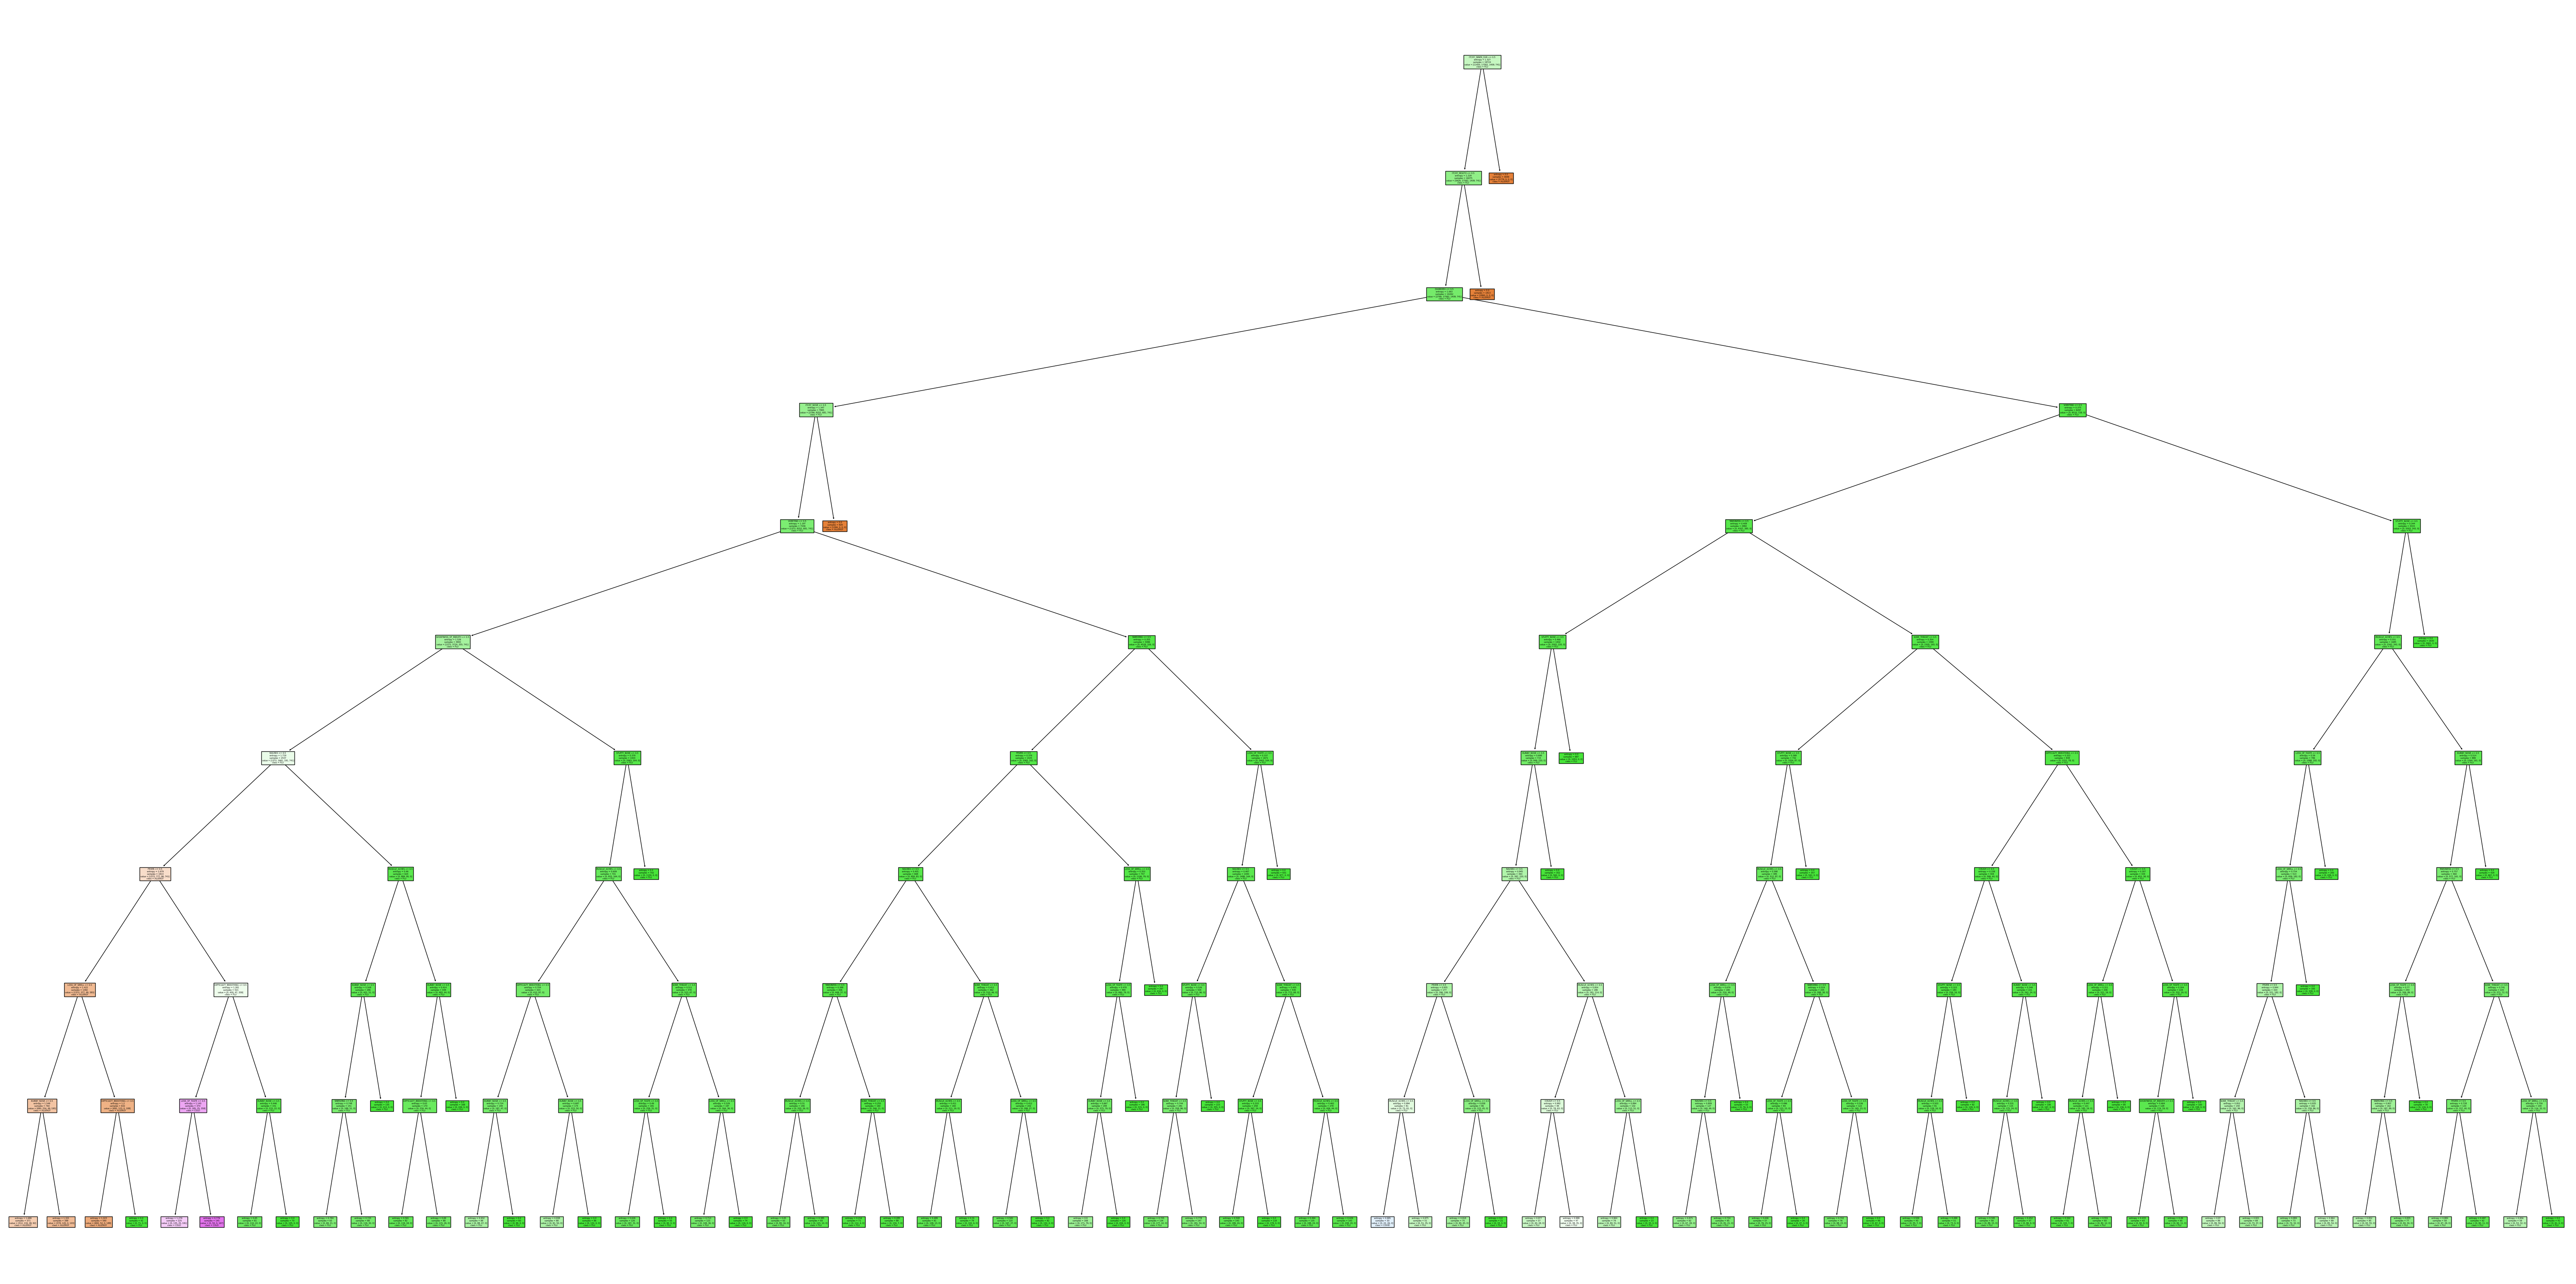

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,40))
column = {""}
plot_tree(rf.estimators_[0], feature_names = X.columns,class_names=['ALLERGY', "FLU", "COVID", "COLD"],filled=True);

In [ ]:
# BAGGING!
# starting with base decision tree classifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train,y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtree.predict(X_test)
print(y_pred)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print or evaluation metrics for each combination
print(f"accuracy score: {accuracy}")
print(f"precision score: {precision}")
print(f"recall score: {recall}")
print(f"f1 score: {f1}")
print('\n')

In [ ]:
from sklearn.ensemble import BaggingClassifier

estimator_range = [2,4,6,8,10,12,14,16]
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

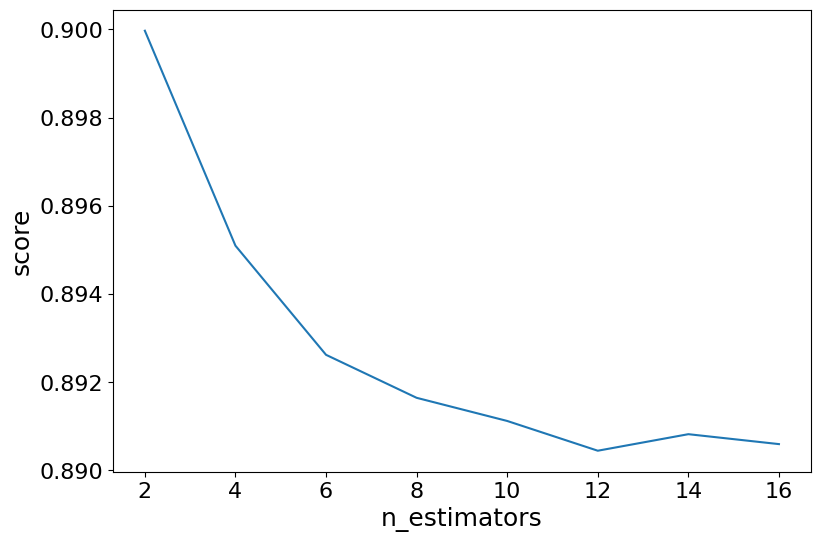

In [ ]:


import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

[Text(0.8378094219362212, 0.9761904761904762, 'PINK_EYE <= 0.5\ngini = 0.547\nsamples = 19610\nvalue = [11442, 17479, 1452, 744]'),
 Text(0.8373740714791031, 0.9285714285714286, 'ITCHY_INNER_EAR <= 0.5\ngini = 0.469\nsamples = 15966\nvalue = [5640, 17479, 1452, 744]'),
 Text(0.8369387210219852, 0.8809523809523809, 'ITCHY_MOUTH <= 0.5\ngini = 0.376\nsamples = 14218\nvalue = [2831, 17479, 1452, 744]'),
 Text(0.8365033705648672, 0.8333333333333334, 'ITCHY_NOSE <= 0.5\ngini = 0.303\nsamples = 13322\nvalue = [1414, 17479, 1452, 744]'),
 Text(0.8360680201077493, 0.7857142857142857, 'ITCHY_EYES <= 0.5\ngini = 0.258\nsamples = 12879\nvalue = [716, 17479, 1452, 744]'),
 Text(0.8356326696506312, 0.7380952380952381, 'RUNNY_NOSE <= 0.5\ngini = 0.232\nsamples = 12659\nvalue = [365, 17479, 1452, 744]'),
 Text(0.7295444805724859, 0.6904761904761905, 'STUFFY_NOSE <= 0.5\ngini = 0.333\nsamples = 6413\nvalue = [191, 8146, 1452, 351]'),
 Text(0.647378033848498, 0.6428571428571429, 'LOSS_OF_TASTE <= 0.5\n

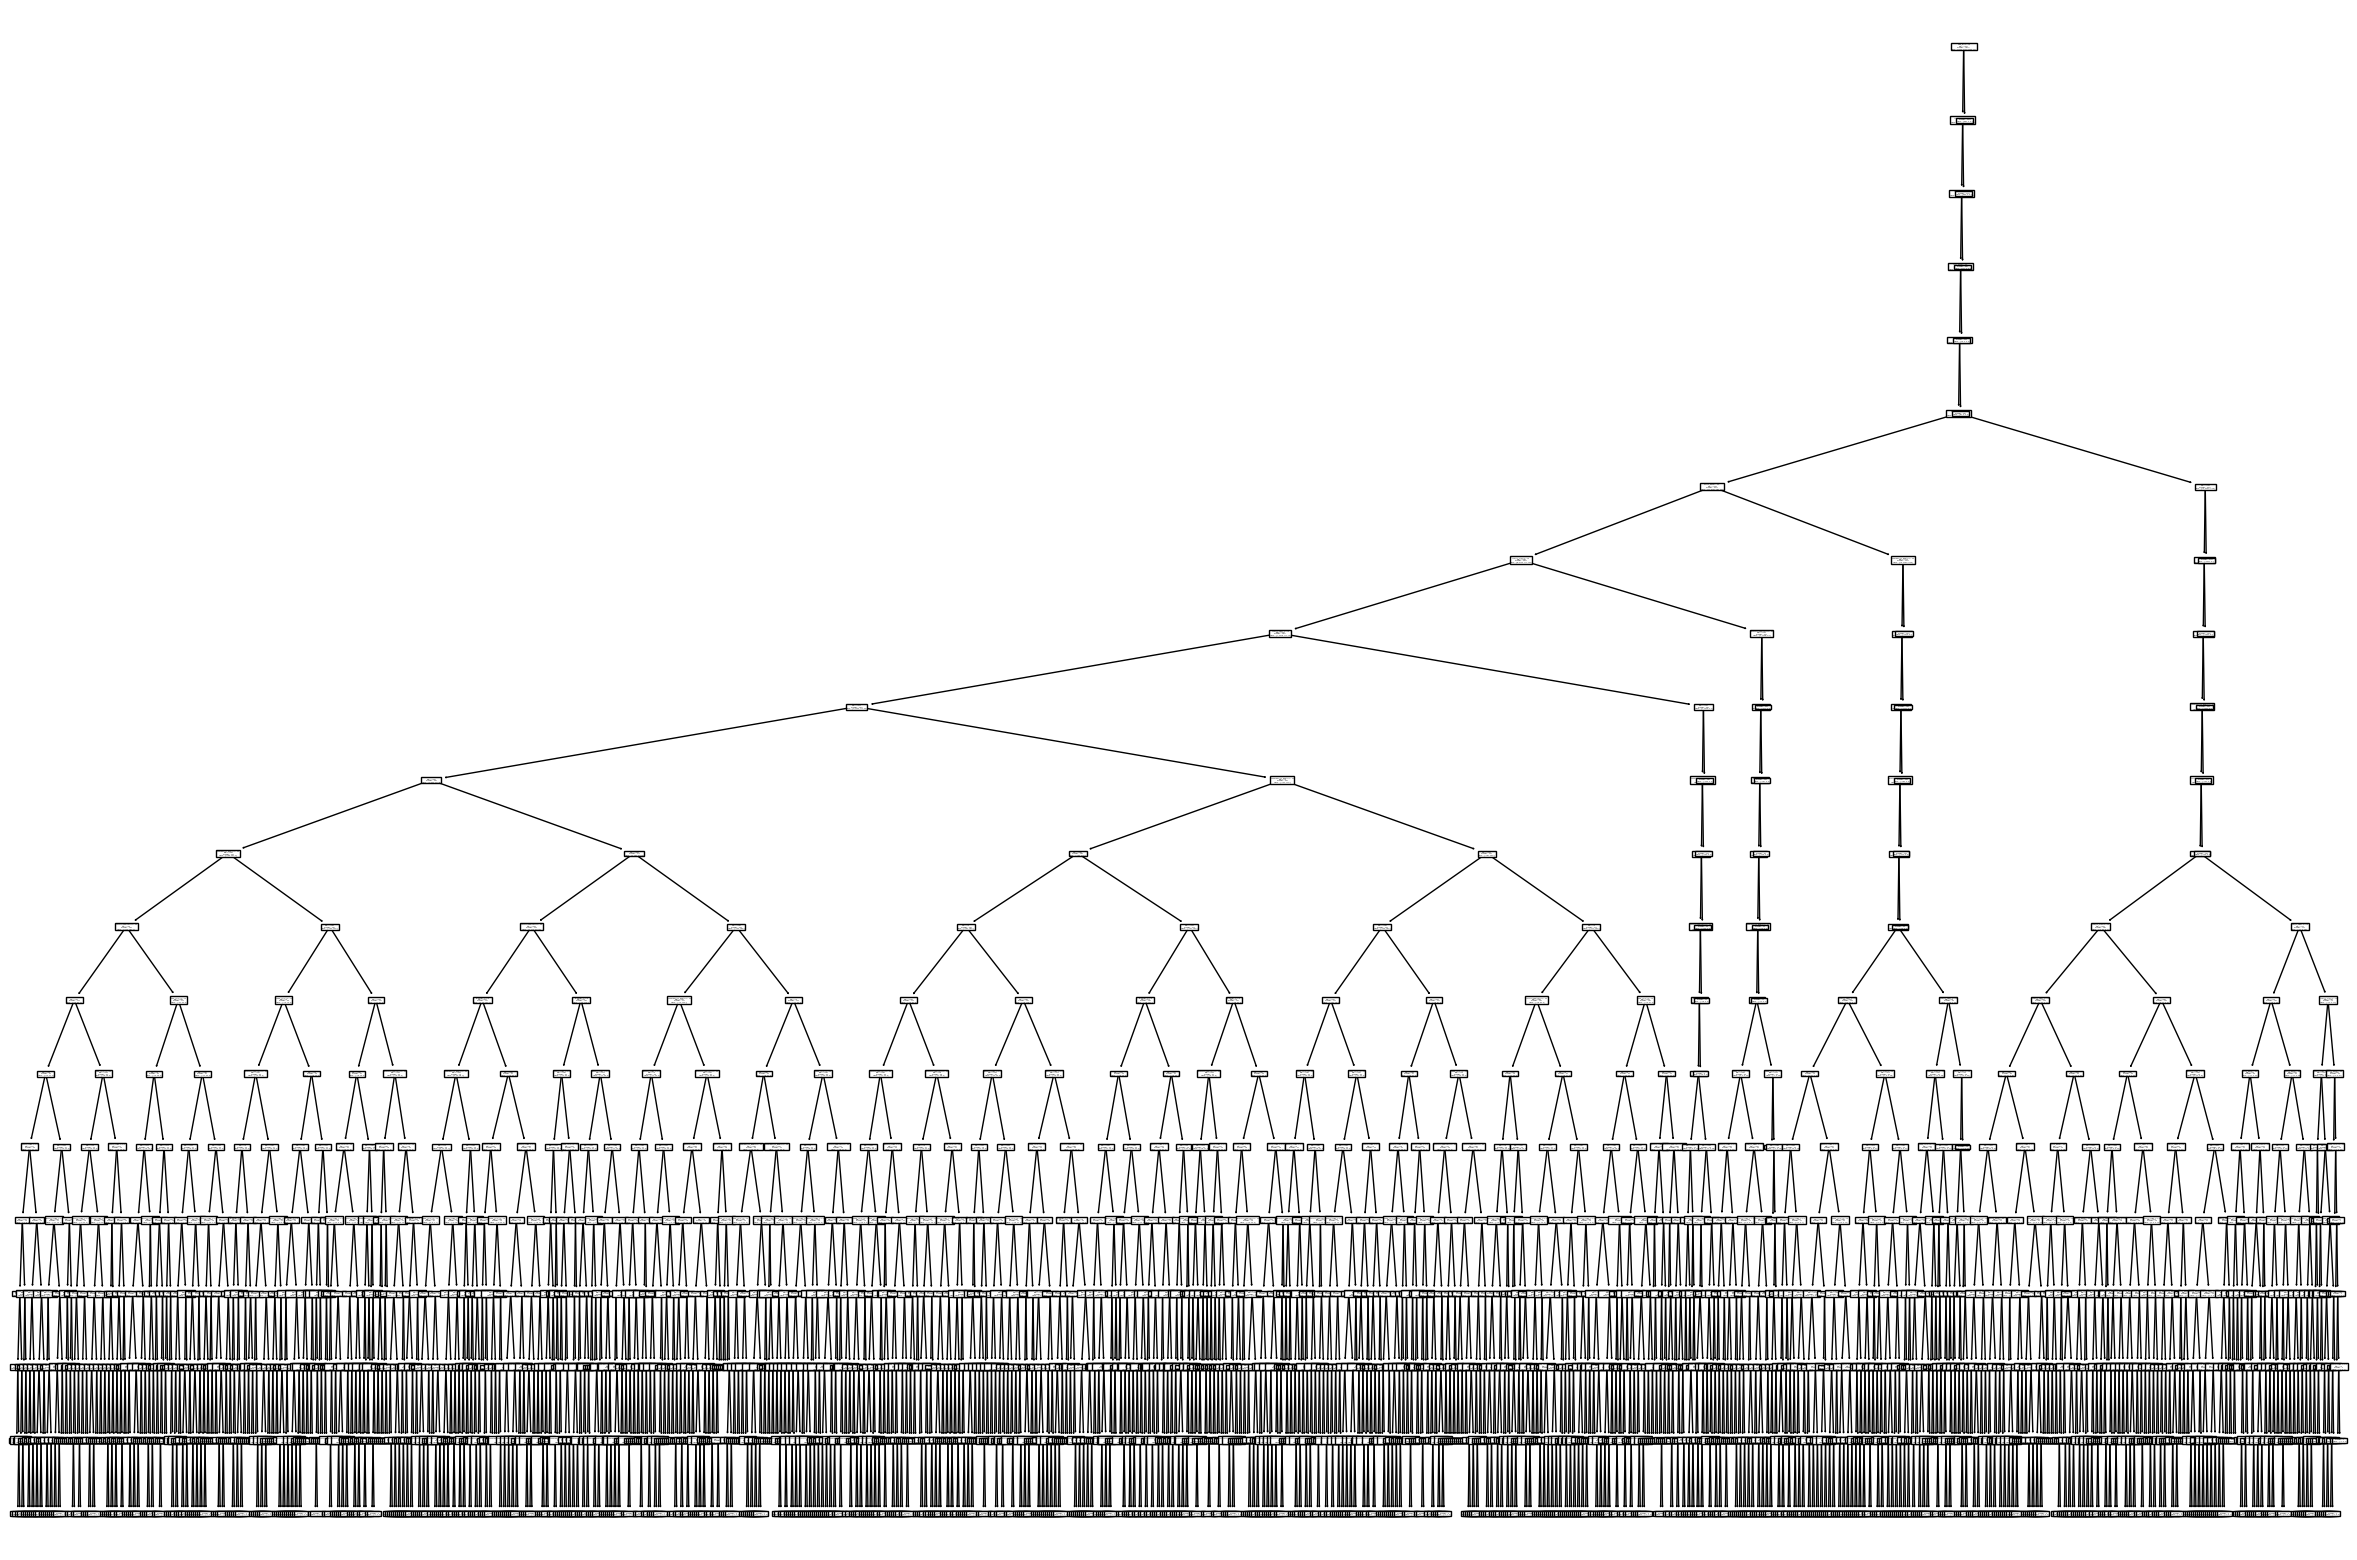

In [ ]:
plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)

In [ ]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print or evaluation metrics for each combination
print(f"accuracy score: {accuracy}")
print(f"precision score: {precision}")
print(f"recall score: {recall}")
print(f"f1 score: {f1}")
print('\n')

accuracy score: 0.8905968806238752
precision score: 0.601495122157869
recall score: 0.6049257199226585
f1 score: 0.603146393258981




In [ ]:
from sklearn.metrics import classification_report

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97      4916
           2       0.92      0.92      0.92      7530
           3       0.17      0.18      0.18       599
           4       0.34      0.35      0.35       291

    accuracy                           0.89     13336
   macro avg       0.60      0.60      0.60     13336
weighted avg       0.89      0.89      0.89     13336



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,40))
plot_tree(rf.estimators_[5], feature_names = X.columns,class_names=['ALLERGY', "No ALLERGY"],filled=True);

In [ ]:
# Generate predictions with the best model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# params = {
#     'max_depth': [10],
#     'min_samples_leaf': [20],
#     'n_estimators': [10],
#     'max_features' : [0.2,1,5,10],
# }
#     # 'criterion' : ['gini', 'entropy']
# from sklearn.model_selection import GridSearchCV
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")
# grid_search.fit(X_train, y_train)


In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,40))
plot_tree(rf.estimators_[5], feature_names = X.columns,class_names=['COVID', "No COVID"],filled=True);

In [ ]:
# # Display plots inline and change default figure size
# import matplotlib
# import sklearn
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# def plot_decision_boundary(pred_func):
# # Set min and max values and give it some padding
#   x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#   y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#   h = 0.01
#   # Generate a grid of points with distance h between them
#   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#   # Predict the function value for the whole gid
#   Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
#   Z = Z.reshape(xx.shape)
#   # Plot the contour and training examples
#   plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
#   plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
#   plt.legend(loc='lower right', borderpad=0, handletextpad=0)


# # Train the RandomForestClassifier
# # redefine X and Y
# X=X_train
# y=y_train
# np.ravel(y,order='C')
# # X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
# #                                                     random_state=0)

# # Display plots inline and change default figure size
# %matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
# # Train the RandomForestClassifier
# clf1 = RandomForestClassifier(random_state=1, n_estimators=100)
# clf1.fit(X, np.ravel(y,order='C'))
# # np.ravel(y,order='C')
# # Plot the decision boundary
# plot_decision_boundary(lambda x: clf1.predict(x))
# plt.title("Random Forest")

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
# get feature importance
imp_df.sort_values(by="Imp", ascending=False)

In [ ]:
 import matplotlib.pyplot as plt
 y_pred = rf.predict(X_test)
 plt.scatter(y_test, y_pred)
 plt.xlabel('True Values ')
 plt.ylabel('Predictions ')
 plt.axis('equal')
 plt.axis('square')
 _ = plt.plot([-100, 100], [-100, 100])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# user DF for the 1,2,3,4 values
df['TYPE'] = df['TYPE'].replace(['ALLERGY', 'FLU', 'COVID', 'COLD'], ['1', '2', '3', '4'])

from sklearn.model_selection import train_test_split
X=df[["RUNNY_NOSE","STUFFY_NOSE"]].values.astype(float)
y=df['TYPE'].values.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test).ravel()

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=10,n_jobs=-1, max_features=20, criterion='entropy',random_state=42)
rf.fit(X_train,y_train)
#1. reverse the standard scaler on the X_train
X_set, y_set = sc.inverse_transform(X_train), y_train
#2. Generate decision surface boundaries
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10 # for Age
min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000 # for salary
#3. Set coordinates scale accuracy
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)
#4. Convert into vector
X1, X2 = np.meshgrid(x_scale, y_scale)
#5. Flatten X1 and X2 and return the output as a numpy array
X_flatten = np.array([X1.ravel(), X2.ravel()])
#6. Transfor the results into it's original form before scaling
X_transformed = sc.transform(X_flatten.T)
#7. Generate the prediction and reshape it to the X to have the same shape
Z_pred = rf.predict(X_transformed).reshape(X1.shape)
#8. set the plot size
plt.figure(figsize=(20,10))
#9. plot the contour function
plt.contourf(X1, X2, Z_pred,
                     alpha = 0.75,
                     cmap = ListedColormap(('#386cb0', '#f0027f')))
#10. setting the axes limit
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#11. plot the points scatter plot ( [salary, age] vs. predicted classification based on training set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue','yellow'))(i),
                label = j)

#12. plot labels and adjustments
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# # Instantiate model with 1000 decision trees

# Hyperparameters to Increase the Predictive Power
# n_estimators: Number of trees the algorithm builds before averaging the predictions.

# max_features: Maximum number of features random forest considers splitting a node.

# min_sample_leaf: Determines the minimum number of leaves required to split an internal node.

# criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)

# !Empirical good default values for number of features are max_features=n_features for regression problems,
# and max_features=sqrt(n_features) for classification tasks

# max_leaf_nodes: Maximum leaf nodes in each tree
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=10,n_jobs=-1, max_features=2, criterion='entropy',random_state=42)
# Train the model on training data

# from sklearn.model_selection import RandomizedSearchCV as RSCV

# param_grid = {'n_estimators':np.arange(50,200,15),
#               'max_features':np.arange(0.1, 1, 0.1),
#               'max_depth': [3, 5, 7, 9],
#               'max_samples': [0.3, 0.5, 0.8]}

# model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
# model = model.best_estimator_


rf.fit(X_train,y_train);

In [ ]:
print(X_train)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
%matplotlib inline
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(rf.score(X_train,y_train)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(rf.score(X_test,y_test)))
dict_characters = {1: 'Malignant', 2: 'Benign',3: 'Benign',4: 'Benign'}
model = rf
prediction = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction)
plt.show()
plot_learning_curve(model, 'Learning Curve For RF', X_train, y_train, (0.80,1.1), 10)
plt.show()
plot_confusion_matrix(cnf_matrix,classes=dict_characters,title='Confusion matrix')
plt.show()